<a href="https://colab.research.google.com/github/IlhamKhalis/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


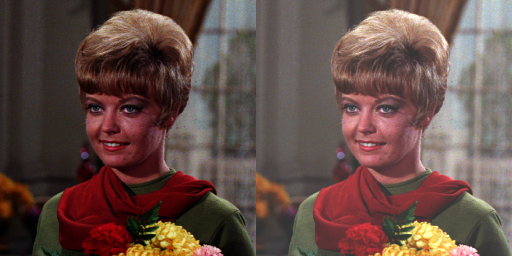

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Tugas

Implementasi inverse citra


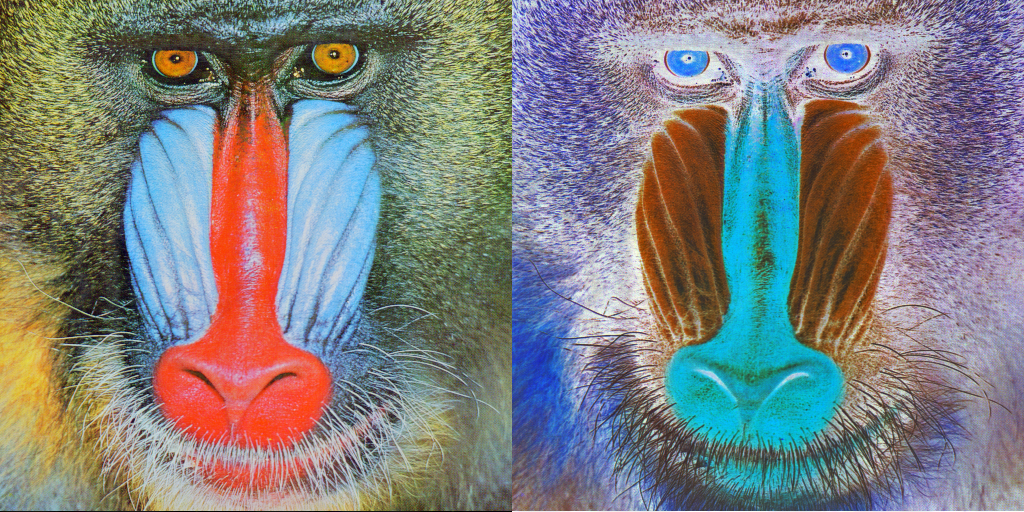

In [3]:
print ('Implementasi inverse citra')
print ('==========================')

original = cv.imread('/content/drive/MyDrive/mandrill.tiff')
inverse_image=np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y,x,c] = np.abs(255-original[y,x,c])

# cara simple tanpa loop
# inverse_image = cv.convertScaleAbs(original, beta=inverse)

final_frame=cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


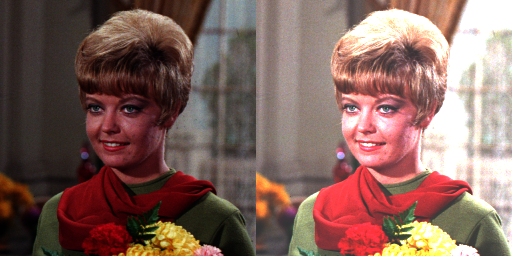

In [4]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


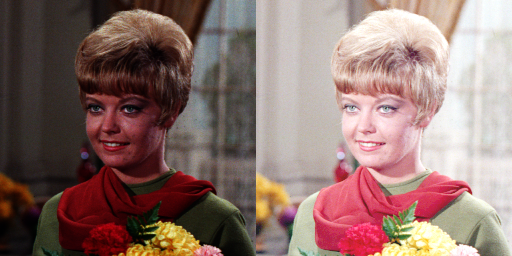

In [5]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Implementasi Grayscale Average


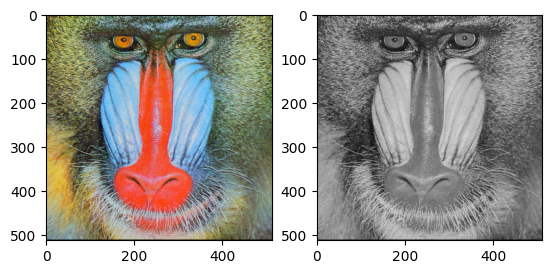

In [6]:
print ('Implementasi Grayscale Average')
print ('==============================')

original1 = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_ori = cv.cvtColor(original1,cv.COLOR_BGR2RGB)
Averaging = np.zeros(original1.shape, original1.dtype)

#akses per piksel
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    Averaging[y,x] = np.mean(original1[y,x])

# cv2_imshow(Averaging)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(Averaging)

Implementasi Grayscale Lightness


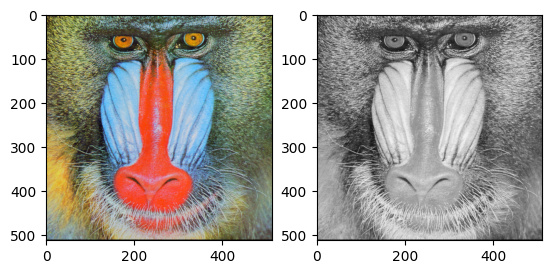

In [7]:
print ('Implementasi Grayscale Lightness')
print ('================================')

original1 = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_ori = cv.cvtColor(original1,cv.COLOR_BGR2RGB)
Lightness = np.zeros(original1.shape, original1.dtype)

#ekstrasi 3 channel warna
# R, G, B = original1[:,:,0],  original1[:,:,1],  original1[:,:,2]
R = original1[:,:,0]
G = original1[:,:,1]
B = original1[:,:,2]
max_channels = np.maximum(np.maximum (R, G), B) # np.max(original1, axis = 2)
min_channels = np.minimum(np.minimum (R, G), B) # np.min(original1, axis = 2)

gray_img = max_channels/2 + min_channels/2
# cv2_imshow(Lightness)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(gray_img, cmap = 'gray')

Implementasi Grayscale Luminance


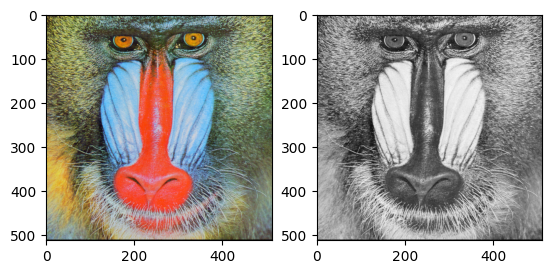

In [8]:
print ('Implementasi Grayscale Luminance')
print ('================================')

original1 = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_ori = cv.cvtColor(original1,cv.COLOR_BGR2RGB)
Averaging = np.zeros(original1.shape, original1.dtype)

#ekstrasi 3 channel warna
R, G, B = original1[:,:,0],  original1[:,:,1],  original1[:,:,2]

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * R)

# cv2_imshow(Averaging)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(gray_img, cmap = 'gray')

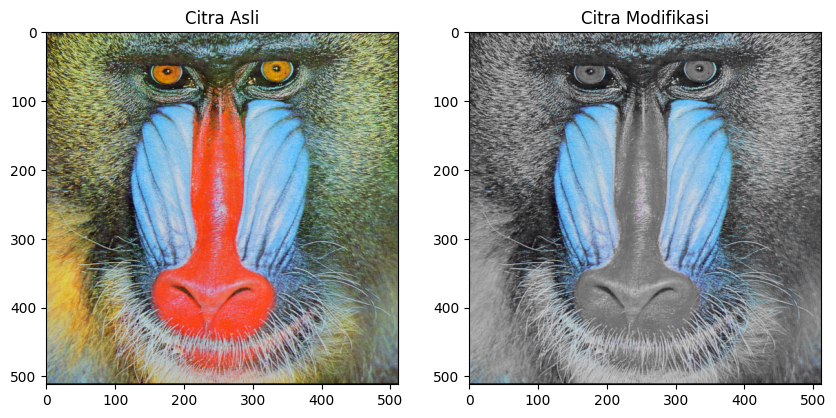

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/mandrill.tiff')
result_image = image.copy()

# Koordinat sudut kiri atas dan kanan bawah dari area yang akan dikecualikan dari grayscale
x1, y1 = 570, 90 # Koordinat sudut kiri atas
x2, y2 = 767, 320 # Koordinat sudut kanan bawah


for y in range(image.shape[0]):
    for x in range(image.shape[1]):

        if image[y, x, 0] > image[y, x, 1] and image[y, x, 0] > image[y, x, 2]:

            result_image[y, x] = image[y, x]
        else:

            gray_value = np.mean(image[y, x])
            result_image[y, x] = [gray_value, gray_value, gray_value]

# Tampilkan citra hasil dengan menggunakan matplotlib

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Modifikasi')
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.show()